In [3]:
import os
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
%matplotlib inline

In [141]:
df1 = pd.read_csv('./bow_model_output.txt', header=-1)

In [142]:
df1.head()

,0,1,2,3,4,5
0,Epoch 0,minibatch 1-160,sumy-leny = 3978-8000,Recall = 0.123474,Precision = 0.533469,F1 = 0.200534
1,Epoch 0,minibatch 2-160,sumy-leny = 3977-8000,Recall = 0.154460,Precision = 0.582301,F1 = 0.244156
2,Epoch 0,minibatch 3-160,sumy-leny = 3981-8000,Recall = 0.132394,Precision = 0.585062,F1 = 0.215926
3,Epoch 0,minibatch 4-160,sumy-leny = 3982-8000,Recall = 0.133333,Precision = 0.545106,F1 = 0.214259
4,Epoch 0,minibatch 5-160,sumy-leny = 3981-8000,Recall = 0.197183,Precision = 0.629685,F1 = 0.300322


In [143]:
df1.columns = ['Epoch', 'Batch','Ys','Recall','Precision','F1']

In [144]:
df1['Recall'] = df1['Recall'].str.replace("Recall = ",'').astype(float)
df1['Precision'] = df1['Precision'].str.replace("Precision = ",'').astype(float)
df1['F1'] = df1['F1'].str.replace("F1 = ",'').astype(float)
df1['Epoch'] = df1['Epoch'].str.replace("Epoch", '').astype(int)

In [147]:
df1['Ys1'] = df1['Ys'].str.replace('sumy-leny = ','').str.replace('-8000', '').astype(int)
df1['Ysn'] = 160

In [148]:
df1.head()

,Epoch,Batch,Ys,Recall,Precision,F1,Ys1,Ysn
0,0,minibatch 1-160,sumy-leny = 3978-8000,0.123474,0.533469,0.200534,3978,160
1,0,minibatch 2-160,sumy-leny = 3977-8000,0.154460,0.582301,0.244156,3977,160
2,0,minibatch 3-160,sumy-leny = 3981-8000,0.132394,0.585062,0.215926,3981,160
3,0,minibatch 4-160,sumy-leny = 3982-8000,0.133333,0.545106,0.214259,3982,160
4,0,minibatch 5-160,sumy-leny = 3981-8000,0.197183,0.629685,0.300322,3981,160


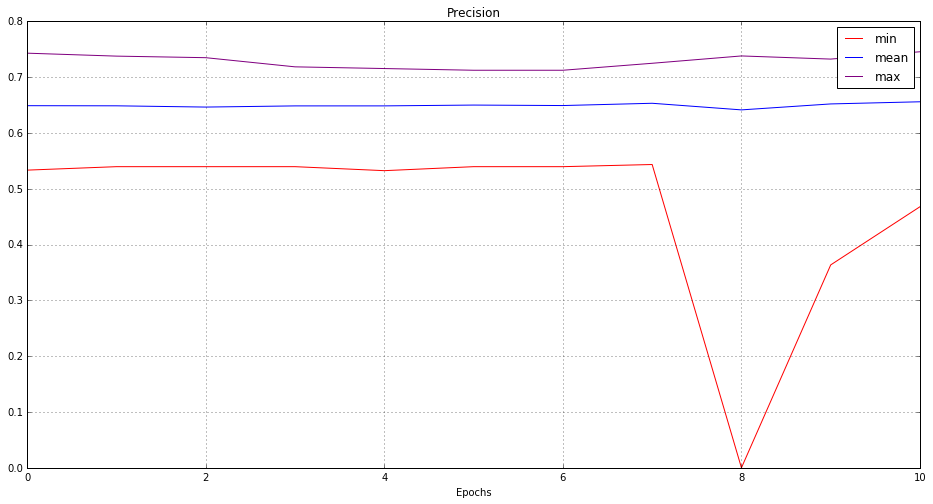

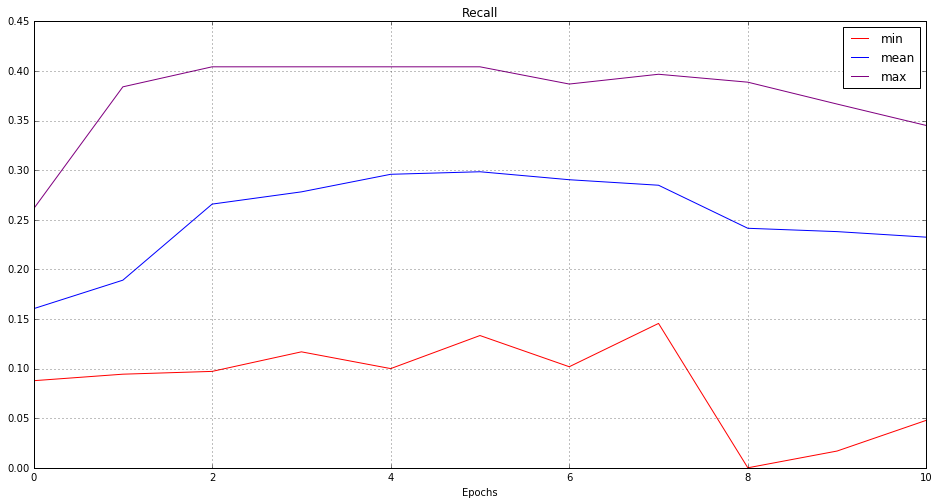

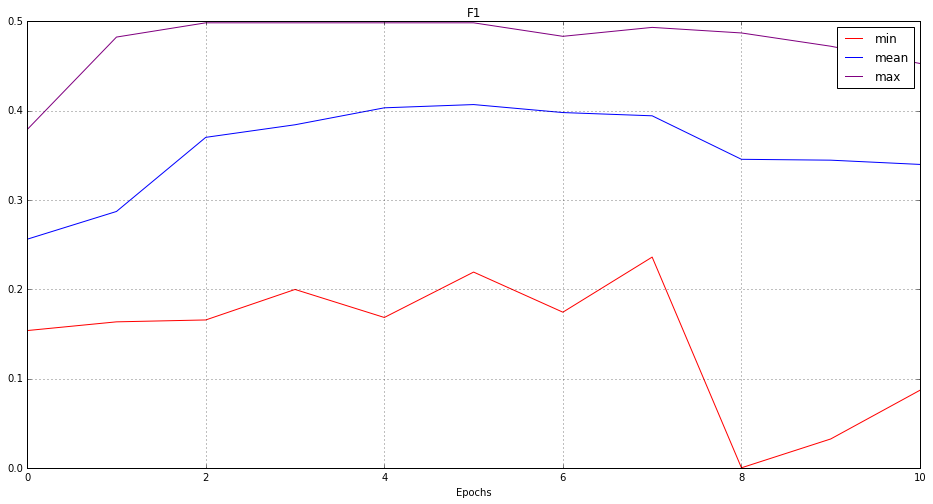

In [180]:
for metric in ('Precision', 'Recall', 'F1'):    
    grouped = df1[[metric,'Epoch']].groupby(['Epoch'])
    df2 = grouped.agg({np.min, np.mean, np.max })
    df2.columns = df2.columns.droplevel(0)
    df2 = df2.rename_axis(None, axis=1)
    df2 = df2.reset_index()

    plt.figure(figsize=(16, 8))
    plt.title(metric)
    plt.plot(df2['Epoch'], df2['amin'], label='min', c='red')
    plt.plot(df2['Epoch'], df2['mean'], label='mean', c='blue')
    plt.plot(df2['Epoch'], df2['amax'], label='max', c='purple')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid()
    plt.show()